In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

# EDA

In [3]:
numeric_columns = [
    "battery_power",
    "clock_speed",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "n_cores",
    "pc",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
]
categorical_columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
target_column = "price_range"
data = data[numeric_columns + categorical_columns + [target_column]]
data[categorical_columns] = data[categorical_columns].astype("category")
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,1,0,0,1,0,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,0,1,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   clock_speed    2000 non-null   float64 
 2   fc             2000 non-null   int64   
 3   int_memory     2000 non-null   int64   
 4   m_dep          2000 non-null   float64 
 5   mobile_wt      2000 non-null   int64   
 6   n_cores        2000 non-null   int64   
 7   pc             2000 non-null   int64   
 8   px_height      2000 non-null   int64   
 9   px_width       2000 non-null   int64   
 10  ram            2000 non-null   int64   
 11  sc_h           2000 non-null   int64   
 12  sc_w           2000 non-null   int64   
 13  talk_time      2000 non-null   int64   
 14  blue           2000 non-null   category
 15  dual_sim       2000 non-null   category
 16  four_g         2000 non-null   category
 17  three_g        2000 non-null   ca

In [5]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


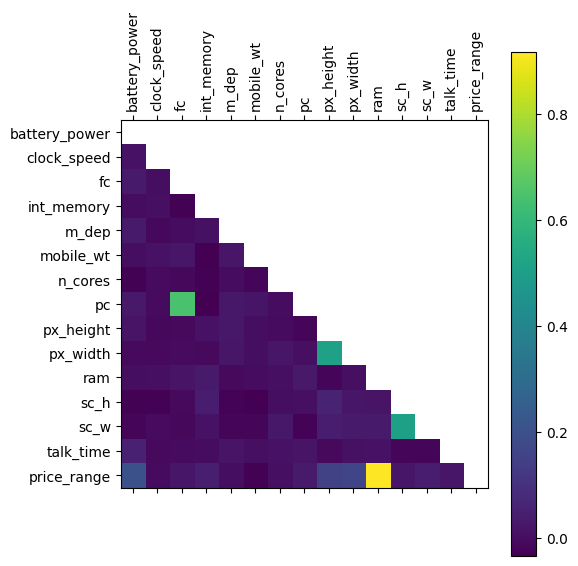

In [6]:
corr = data[numeric_columns + [target_column]].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = None

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

matrix_plot = ax.matshow(corr, cmap="viridis")
ax.set_xticks(range(corr.shape[0]), corr.index, rotation=90)
ax.set_yticks(range(corr.shape[0]), corr.index)

fig.colorbar(matrix_plot)
fig.tight_layout()
fig.show()

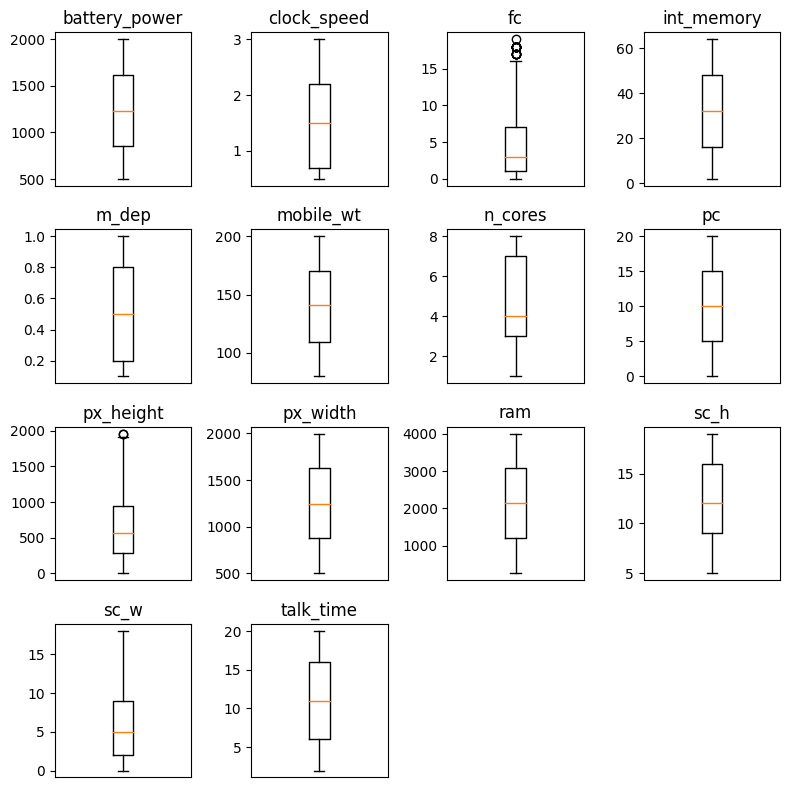

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
axes = axes.flatten()

for ax, column_name in zip(axes, numeric_columns):
    ax.boxplot(data[column_name])
    ax.set_xticks([])
    ax.set_title(column_name)

for ax in axes[-(len(axes) - len(numeric_columns)):]:
    ax.axis("off")

fig.tight_layout()
fig.show()

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16))
axes = axes.flatten()
data_by_price_range = data.groupby("price_range", observed=True)

for ax, column_name in zip(axes, numeric_columns):
    ax.hist([x[1][column_name] for x in data_by_price_range], stacked=True, label=[x[0] for x in data_by_price_range])
    ax.set_title(column_name)
    ax.legend(title="Price range", loc="upper right")

fig.tight_layout()
fig.show()

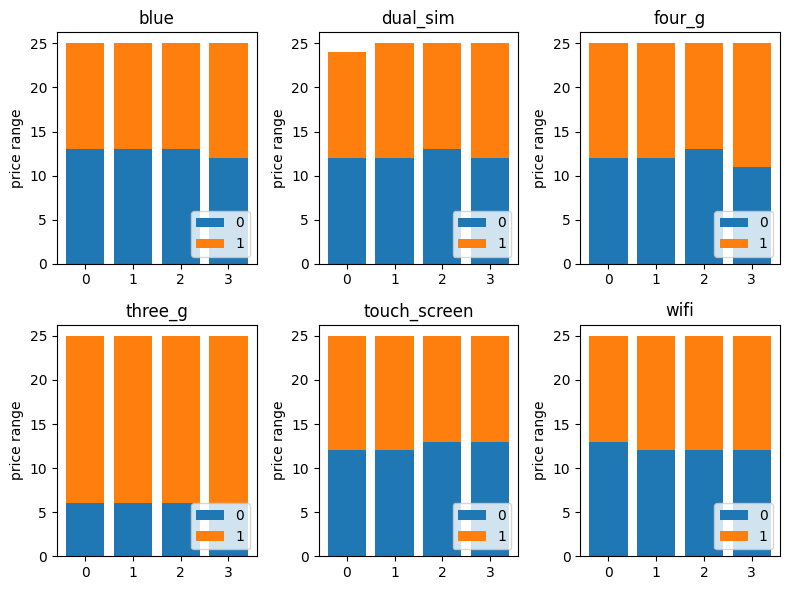

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes = axes.flatten()

for ax, column_name in zip(axes, categorical_columns):
    value_counts = data.groupby(column_name, observed=True)["price_range"].value_counts()
    value_counts = (value_counts / len(data) * 100).round()
    value_counts = value_counts.sort_index()
        
    ax.bar(value_counts.loc[0].index.astype(str), value_counts.loc[0], label="0")
    ax.bar(value_counts.loc[1].index.astype(str), value_counts.loc[1], bottom=value_counts.loc[0], label="1")
    
    ax.set_title(column_name)
    ax.set_ylabel("%")
    ax.set_ylabel("price range")
    ax.legend(loc="lower right")

fig.tight_layout()
fig.show()

In [10]:
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 97.56% 
    test set:  97.50% 


# Decision Tree

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 100.00% 
    test set:  82.25% 


In [13]:
param_grid = {
    'max_depth': [None, 2, 4, 8, 16, 32],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier()
search = GridSearchCV(model, param_grid, cv=5)
search.fit(X_train, y_train)

print(f"Best score: {search.best_score_ * 100:.2f}%")
print("Best params:", search.best_params_)

model = search.best_estimator_

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}%")
print(f"    test set:  {test_accuracy:.2f}%")

Best score: 86.00%
Best params: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8}
Model accuracy:
    train set: 96.62%
    test set:  85.25%


# Random Forest

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 100.00% 
    test set:  87.25% 


# Gradient Boosting

In [15]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Model accuracy:
    train set: 99.94% 
    test set:  90.50% 


# # NN

In [16]:
import torch
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch.optim import Adam
from torch.nn import Sequential, Linear, ReLU, CrossEntropyLoss

In [17]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

In [18]:
X_train.shape

torch.Size([1600, 20])

In [19]:
model = Sequential(
    Linear(20, 100), 
    ReLU(), 
    Linear(100, 80),
    ReLU(),
    Linear(80, 50),
    ReLU(),
    Linear(50, 4)
)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters())
epochs = 5_000

for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 1_000 == 0:
        print(f"Epoch {epoch:04d}/{epochs}: loss - {loss.item():.4f}")
        
model.eval()
with torch.no_grad():
    train_accuracy = accuracy_score(y_train, torch.argmax(model(X_train), dim=1)) * 100
    test_accuracy = accuracy_score(y_test, torch.argmax(model(X_test), dim=1)) * 100

print("Model accuracy:")
print(f"    train set: {train_accuracy:.2f}% ")
print(f"    test set:  {test_accuracy:.2f}% ")

Epoch 1000/5000: loss - 0.0001
Epoch 2000/5000: loss - 0.0000
Epoch 3000/5000: loss - 0.0000
Epoch 4000/5000: loss - 0.0000
Epoch 5000/5000: loss - 0.0000
Model accuracy:
    train set: 100.00% 
    test set:  91.25% 


In [20]:
from typing import Tuple

import numpy as np
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch import Tensor
from torch.nn import Module, Linear, ReLU, CrossEntropyLoss
from torch.optim import Adam, Optimizer
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [21]:
class PredictModel(Module):
    def __init__(self, input_size: int, hidden_size: int, num_classes: int) -> None:
        super().__init__() 
        self.fc1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.fc2 = Linear(hidden_size, num_classes)

    def forward(self, x: Tensor) -> Tensor:
        out = self.fc1(x)
        out = self.relu(out)
        return self.fc2(out)

In [22]:
def train_one_epoch(model: Module, criterion: Module, optimizer: Optimizer, dataloader: DataLoader) -> Tuple[float, float]:
    model.train()
    total_loss = 0
    total_accuracy = 0

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_accuracy += accuracy_score(outputs.detach().argmax(dim=1), targets)

    return total_loss / len(dataloader), total_accuracy / len(dataloader)

In [23]:
def validate_one_epoch(model: Module, criterion: Module, dataloader: DataLoader) -> Tuple[float, float]:
    model.eval()
    total_loss = 0
    total_accuracy = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            total_accuracy += accuracy_score(outputs.argmax(dim=1), targets)

    return total_loss / len(dataloader), total_accuracy / len(dataloader)

In [24]:
train_dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=4) 
val_dataloader = DataLoader(TensorDataset(X_test, y_test), batch_size=4)

In [25]:
model = PredictModel(input_size=20, hidden_size=16, num_classes=4)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 100
history = {"epoch": [], "loss": [], "accuracy": [], "val_loss": [], "val_accuracy": []}

for epoch in range(1, epochs + 1):
    loss, accuracy = train_one_epoch(model=model, criterion=criterion, optimizer=optimizer, dataloader=train_dataloader)
    val_loss, val_accuracy = validate_one_epoch(model=model, criterion=criterion, dataloader=val_dataloader)
    print(
        f"Epoch {epoch:03d}/{epochs}: "
        f"loss {loss:.04f} - accuracy {accuracy:.4f} - "
        f"val loss - {val_loss:.04f} - val accuracy {val_accuracy:.4f}"
    )
    history["epoch"].append(epoch)
    history["loss"].append(loss)
    history["accuracy"].append(accuracy)
    history["val_loss"].append(val_loss)
    history["val_accuracy"].append(val_accuracy)


torch.save(model.state_dict(), "model.pt")

Epoch 001/100: loss 1.2695 - accuracy 0.4238 - val loss - 1.0457 - val accuracy 0.6125
Epoch 002/100: loss 0.8785 - accuracy 0.6494 - val loss - 0.6902 - val accuracy 0.7575
Epoch 003/100: loss 0.6335 - accuracy 0.7806 - val loss - 0.5224 - val accuracy 0.8575
Epoch 004/100: loss 0.4862 - accuracy 0.8781 - val loss - 0.4099 - val accuracy 0.9150
Epoch 005/100: loss 0.3855 - accuracy 0.9156 - val loss - 0.3335 - val accuracy 0.9375
Epoch 006/100: loss 0.3166 - accuracy 0.9356 - val loss - 0.2804 - val accuracy 0.9475
Epoch 007/100: loss 0.2682 - accuracy 0.9481 - val loss - 0.2421 - val accuracy 0.9625
Epoch 008/100: loss 0.2327 - accuracy 0.9550 - val loss - 0.2144 - val accuracy 0.9600
Epoch 009/100: loss 0.2061 - accuracy 0.9625 - val loss - 0.1932 - val accuracy 0.9600
Epoch 010/100: loss 0.1852 - accuracy 0.9675 - val loss - 0.1771 - val accuracy 0.9625
Epoch 011/100: loss 0.1687 - accuracy 0.9694 - val loss - 0.1647 - val accuracy 0.9625
Epoch 012/100: loss 0.1552 - accuracy 0.971

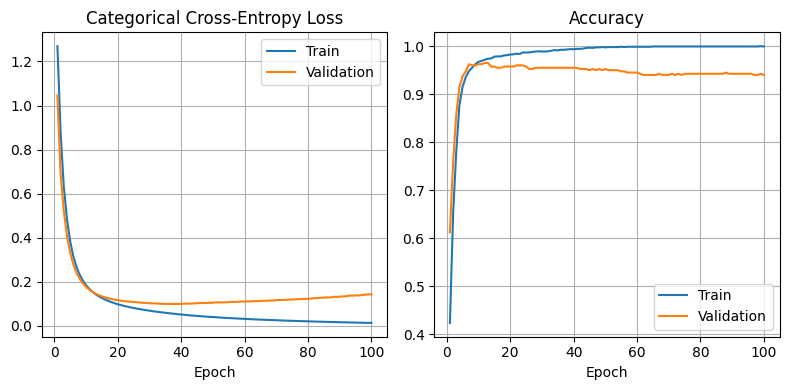

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].plot(history["epoch"], history["loss"], label="Train")
ax[0].plot(history["epoch"], history["val_loss"], label="Validation")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Epoch")
ax[0].set_title("Categorical Cross-Entropy Loss")

ax[1].plot(history["epoch"], history["accuracy"], label="Train")
ax[1].plot(history["epoch"], history["val_accuracy"], label="Validation")
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Epoch")
ax[1].set_title("Accuracy")

fig.tight_layout()
fig.show()